In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
train_df=pd.read_csv("/fashion-mnist_train.csv")
test_df=pd.read_csv("/fashion-mnist_test.csv")

train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211.0,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171.0,249.0,207.0,197.0,202.0,45.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,25.0,69.0,52.0,45.0,74.0,39.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230.0,237.0,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,116.0,112.0,136.0,147.0,144.0,121.0,102.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data=np.array(train_df,dtype='float32')
test_data=np.array(test_df,dtype='float32')

x_train=train_data[:,1:] /255
y_train=train_data[:,0]

x_test=test_data[:,1:] /255
y_test=test_data[:,0]


In [ ]:
x_train, x_validate, y_train, y_validate=train_test_split(x_train,y_train,test_size=0.2,random_state=12345,)




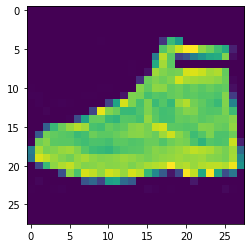

In [ ]:
image=x_train[500,:].reshape((28,28))
plt.imshow(image)
plt.show()

CREATE THE CNN

Define the model

Compile the model

Fit the model




In [ ]:
im_rows=28
im_cols=28
batch_size=512
im_shape=(im_rows,im_cols,1)
x_train=x_train.reshape(x_train.shape[0],*im_shape)
x_test=x_test.reshape(x_test.shape[0],*im_shape)
x_validate=x_validate.reshape(x_validate.shape[0],*im_shape)


In [ ]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (33293, 28, 28, 1)
x_test shape: (8987, 28, 28, 1)
x_validate shape: (8324, 28, 28, 1)


In [ ]:
cnn_model= Sequential([
                       Conv2D(filters=32,kernel_size=3, activation='relu',input_shape=im_shape),
                       MaxPooling2D(pool_size=2),
                       Dropout(0.2),

                       Flatten(),
                       Dense(32,activation='relu'),
                       Dense(10,activation='softmax')

])

In [ ]:
tensorboard=TensorBoard(
    log_dir=r'log\'{}'.format('cnn_1layer'),
    write_graph=True,
    
    histogram_freq=1,
    write_images=True,
    )
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10,verbose=1,
    validation_data=(x_validate, y_validate)
    callbacks=[tensorboard]
)

SyntaxError: ignored

In [ ]:
score=cnn_model.evaluate(x_test,y_test,verbose=0)

print('test loss:{:.4f}'.format(score[0]))
print('test acc:{:.4f}'.format(score[1]))

test loss:nan
test acc:0.0995


Basic workflow

read the fashionMNIST data

create a summary writer

create the embedding tensor from X

configure the projector 

run the TF session and create a model check-point

create the sprite image

create the metadata(labels) file



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

ModuleNotFoundError: ignored